## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = "/content/drive/MyDrive/Almabetter/Capstone Projects/AirBnB Booking Analysis/"
nyc_df = pd.read_csv(file_path+"Airbnb NYC 2019.csv")

In [4]:
# Total number of rows and columns in dataset 
nyc_df.shape

(48895, 16)

In [5]:
# checking the basic information of dataset
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# List of column names of the dataset
nyc_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Understadning, Wrangling and Cleaning Data

In [7]:
# count the number of missing values in each column
nyc_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

 * The highest missing value is in reviews_per_month and last_reviews column, I thing this becz most of people don't write the reviews.host_name and name also have the missing value this may be becz of some technical issue.
* We can handle the missing value in review_per_month by default value.
* We can handle the missing value in name and host_name only by droping them.

In [8]:
# Filling the missing value in reviews_per_month  with default value 0 (0 reviews) 
nyc_df['reviews_per_month'].fillna(0,inplace=True)

In [9]:
#Drop unecessary attributes which is not relevant to book a room:name and last_review
nyc_df.drop(['name','last_review'],axis=1,inplace=True)

In [10]:
# Droping rows which is have null values 
nyc_df.dropna(inplace=True)

In [11]:
nyc_df.isnull().sum(),nyc_df.shape

(id                                0
 host_id                           0
 host_name                         0
 neighbourhood_group               0
 neighbourhood                     0
 latitude                          0
 longitude                         0
 room_type                         0
 price                             0
 minimum_nights                    0
 number_of_reviews                 0
 reviews_per_month                 0
 calculated_host_listings_count    0
 availability_365                  0
 dtype: int64, (48874, 14))

* There is no missing values in dataset now.

In [12]:
# Getting the basic statistics analysis of the overall dataset
nyc_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887400e+04,4.887400e+04,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000
mean,1.901988e+07,6.762157e+07,40.728946,-73.952172,152.738634,7.031387,23.266358,1.090785,7.146458,112.793755
std,1.098318e+07,7.861415e+07,0.054529,0.046156,240.199728,20.514423,44.544330,1.597119,32.959378,131.619934
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.474068e+06,7.823258e+06,40.690100,-73.983078,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967936e+07,3.079257e+07,40.723065,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915342e+07,1.074344e+08,40.763110,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


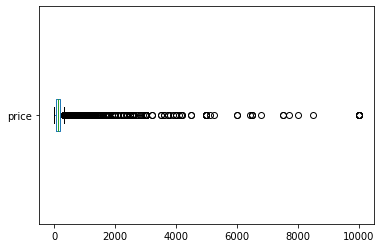

In [13]:
# checking for outlier in price
nyc_df.price.plot(kind='box',vert=False)
plt.show()

* The box plot above helps to visualize the price distribution.
* We have lower quantile at price`$0`.
* We have upper quantile at price`$10,000`.

In [14]:
# Defining the price range
q_low = nyc_df["price"].quantile(0.01)
q_hi  = nyc_df["price"].quantile(0.995)
q_low,q_hi

(30.0, 1000.0)

In [15]:
airbnb_df = nyc_df[(nyc_df["price"] < q_hi) & (nyc_df["price"] > q_low)]
airbnb_df.shape

(47918, 14)

In [16]:
# Examining the unique value in neighbourhood group column
airbnb_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
# Examining the unique value in neighbourhood column
len(airbnb_df['neighbourhood'].unique())

221

In [18]:
# Examining the unique value in room type column
airbnb_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Exploring and Visualizing Data

In [19]:
# First 5 rows
airbnb_df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [20]:
# Last 5 rows
airbnb_df.tail()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.0,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.0,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2
48894,36487245,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23


In [21]:
# Getting the basic statistics analysis of the overall dataset
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.791800e+04,4.791800e+04,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000
mean,1.897099e+07,6.724387e+07,40.729133,-73.952386,141.817209,6.970867,23.464293,1.095795,7.212488,112.430611
std,1.098985e+07,7.851233e+07,0.054271,0.045886,112.889805,20.319163,44.777847,1.600279,33.256671,131.326526
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.421125e+06,7.722615e+06,40.690320,-73.983110,70.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.960821e+07,3.043637e+07,40.723175,-73.955825,109.000000,3.000000,5.000000,0.380000,1.000000,45.000000
75%,2.910544e+07,1.072455e+08,40.763197,-73.936833,175.000000,5.000000,24.000000,1.590000,2.000000,226.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,999.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* The average price in NYC is 141 dollar and median price is 109 dollar.

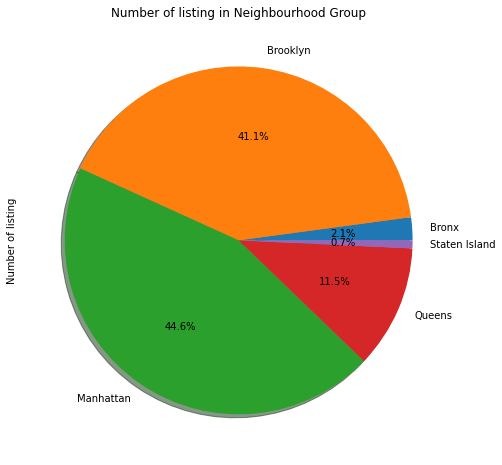

In [22]:
# Number of listing in neighbourhood group
ng_Listing = pd.DataFrame(airbnb_df.groupby('neighbourhood_group')['id'].count())

#Pie chart to see different neighbourhood_group by listing

ax = ng_Listing.plot.pie(y='id',autopct='%1.1f%%', legend = False, title='Number of listing in Neighbourhood Group',shadow=True, figsize=(18,8))
ax.set_ylabel('Number of listing');

* 85% of Airbnb are distrbute in Manhattan and Brooklyn where as other very less Airbnb locations.
* Most of the people stay in Manhattan and Brooklyn.

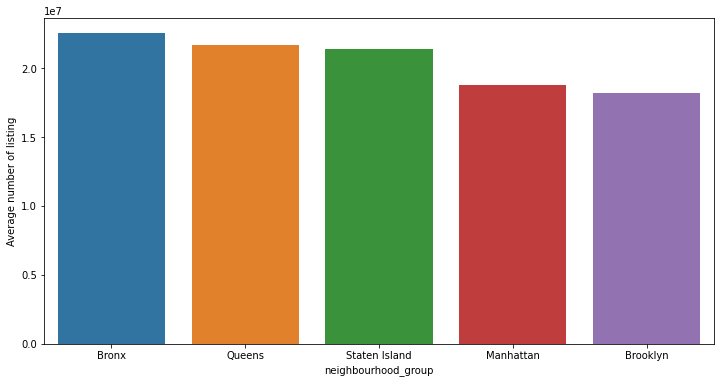

In [23]:
# Average number of listing in different neighbourhood group
ng_AvgListing = airbnb_df.groupby(['neighbourhood_group'])['id'].mean().reset_index().sort_values('id',ascending=False,ignore_index=True)

# Barplot to see  different neighbourhood group by listing
plt.rcParams['figure.figsize'] = (12, 6)

ax = sns.barplot(x='neighbourhood_group',y='id',data=ng_AvgListing)
ax.set_ylabel('Average number of listing');

* Average number of listing  in Bronx followed by Queens.

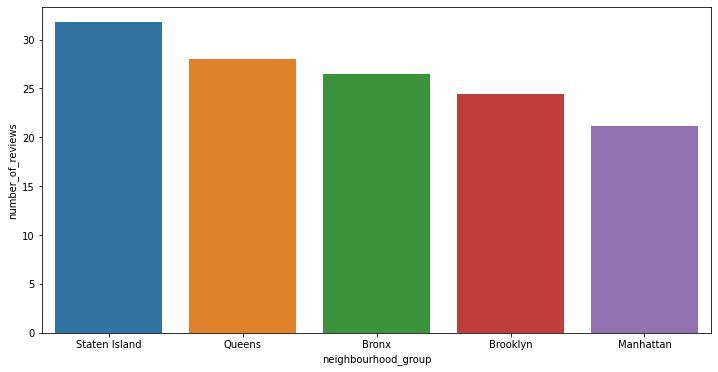

In [24]:
# Average reviews Airbnb in different neighbourhood group
ng_numRev = airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].mean().reset_index().sort_values('number_of_reviews',ascending=False,ignore_index=True)

# Barplot to see  different neighbourhood group by reviews
sns.barplot(x='neighbourhood_group',y='number_of_reviews',data=ng_numRev);

* The most reviews neighbourhood group is stated island, followed by Bronx then Queens.

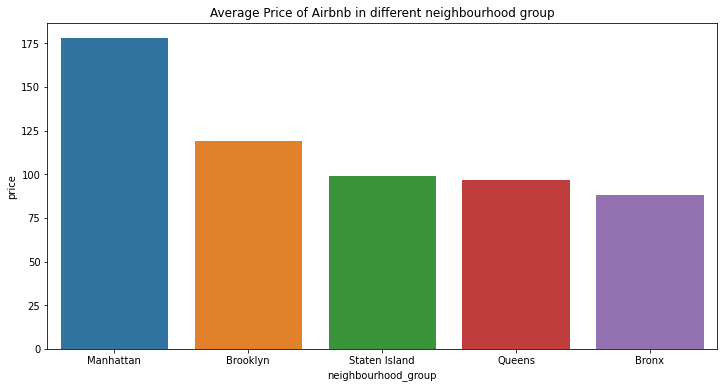

In [25]:
#Average price of AirBnb in different neighbourhood_group 
ng_avgprice = airbnb_df.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values('price',ascending=False,ignore_index=True)

# Barplot to see different neighbourhood group by price
sns.barplot(x="neighbourhood_group", y="price", data=ng_avgprice)
plt.title('Average Price of Airbnb in different neighbourhood group');

* location wise distribution of price shows that Manhattan has expensive and Bronx has low priced rooms.
* If you opt for Bronx you have to pay 50% less then Manhattan.

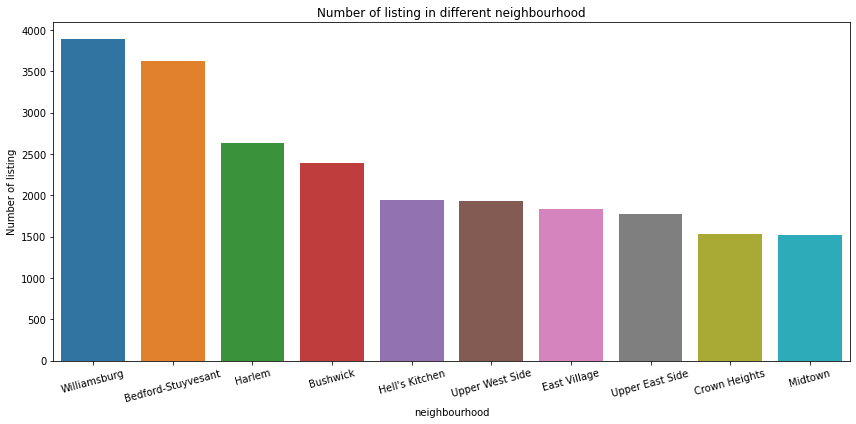

In [26]:
# Number of AirBnb in different neighbourhood
n_Listing = airbnb_df.groupby(['neighbourhood',])['id'].count().reset_index().sort_values('id',ascending=False,ignore_index=True).head(10)

# Barplot of different neighbourhood

ax = sns.barplot(x="neighbourhood", y="id", data=n_Listing)
plt.title('Number of listing in different neighbourhood')
ax.set(xlabel="neighbourhood", ylabel = "Number of listing")
plt.xticks(rotation=15)
plt.tight_layout()

* Most of the Airbnb location are available in this top 15 neighbourhood and people prefer to stay here.
* The top 2 neighbourhood which is most prefer by people is   Williamsburg	and Bedford-Stuyvesant.

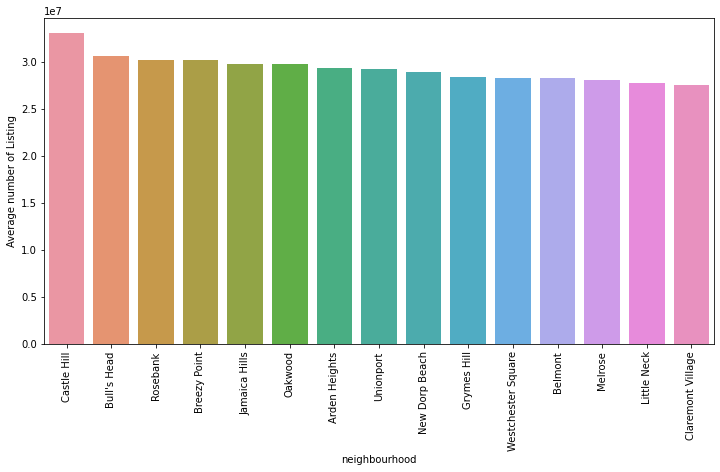

In [27]:
# Average number of listing in different neighbourhood
n_AvgListing = airbnb_df.groupby(['neighbourhood'])['id'].mean().reset_index().sort_values('id',ascending=False,ignore_index=True).head(15)

# Barplot to see  different neighbourhood by listing
ax = sns.barplot(x='neighbourhood',y='id',data=n_AvgListing)
ax.set_ylabel('Average number of Listing')
plt.xticks(rotation=90)
plt.show()

* Average  of number of listing in castle hill followed by Bull's Head.

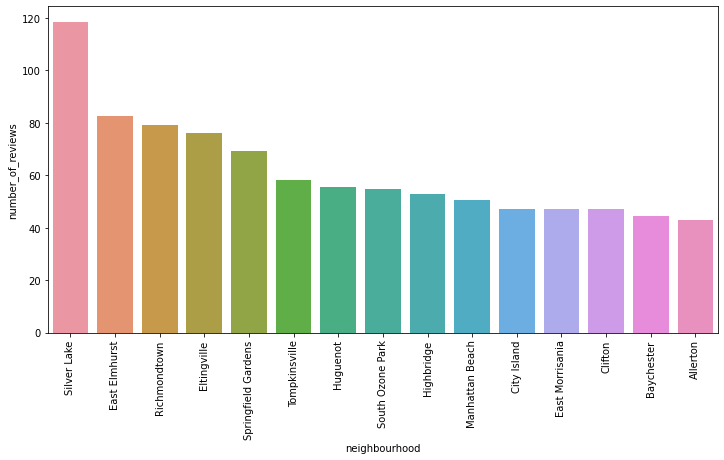

In [28]:
# Average reviews of Airbnb in different neighbourhood
n_numRev = airbnb_df.groupby(['neighbourhood'])['number_of_reviews'].mean().reset_index().sort_values('number_of_reviews',ascending=False,ignore_index=True).head(15)

# Barplot to see different neighbourhood by reviews
sns.barplot(x='neighbourhood',y='number_of_reviews',data=n_numRev)
plt.xticks(rotation=90);

* The most review neighbourhood is silver lake with average reviews of 118 per month, followed by East Elmhurst	 with average review of 83.

In [29]:
#Average price of AirBnb in different neighbourhood
# Average price of top 10 most expensive neighbourhood
n_avgprice1 = pd.DataFrame(airbnb_df.groupby('neighbourhood')['price'].mean().reset_index().sort_values('price',ascending=False,ignore_index=True).head(10))
# Average price of top 10 most cheapest neighbourhood
n_avgprice2 = pd.DataFrame(airbnb_df.groupby('neighbourhood')['price'].mean().reset_index().sort_values('price',ascending=False,ignore_index=True).tail(10))
# combine the both 
n_avgprice =pd.concat([n_avgprice1,n_avgprice2])


Text(0.5, 1.0, 'Average Price of Airbnb in different neighbourhood')

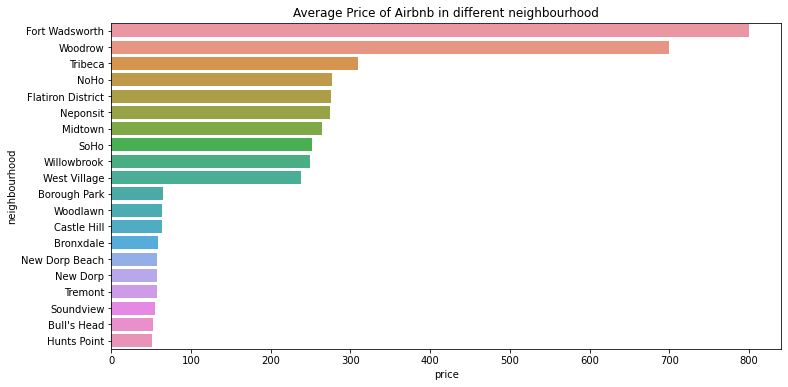

In [30]:
# Barplotto see different neighbourhood by price
sns.barplot(x='price', y='neighbourhood', data=n_avgprice)
plt.title('Average Price of Airbnb in different neighbourhood')

* Most expensive neighbourhood is  fort Wadsworth followed by Woodrow then Wribeca.
* Most cheapest neighbourhood is hunts point followed by bull's head then Soundview.

[Text(0, 0.5, 'Number of listing')]

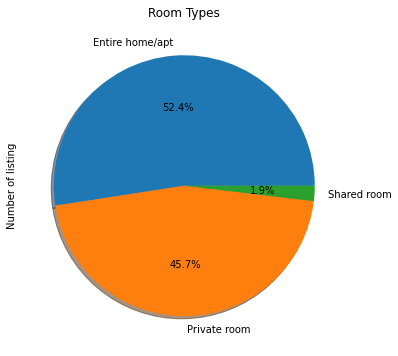

In [31]:
# Listing of different room_type
rt_Listing = pd.DataFrame(airbnb_df.groupby('room_type')['id'].count())

# Pie chart to see different room_type by count
ax = rt_Listing.plot.pie(y='id', autopct='%1.1f%%', legend = False, figsize=(18,6),shadow=True)
plt.title('Room Types')
ax.set(ylabel = "Number of listing")

* The demand of entire home and private room is more high and people also choose entire home and private room.
* As per the dataset 98.1% of them are entire home or private room and only 1.9% of them are share room. 

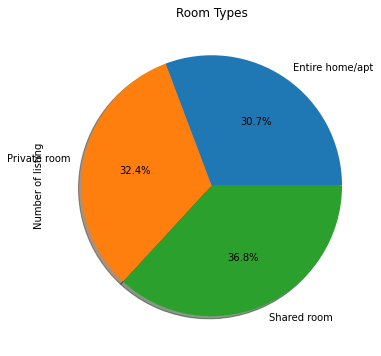

In [32]:
# Average number of Listing in different room_type
rt_AvgListing = pd.DataFrame(airbnb_df.groupby('room_type')['id'].mean())

# Pie chart to see different room_type by listing
ax = rt_AvgListing.plot.pie(y='id', autopct='%1.1f%%', legend = False, figsize=(18,6),shadow=True)
plt.title('Room Types')
ax.set(ylabel = "Number of listing");

* Average listing is more in share room.

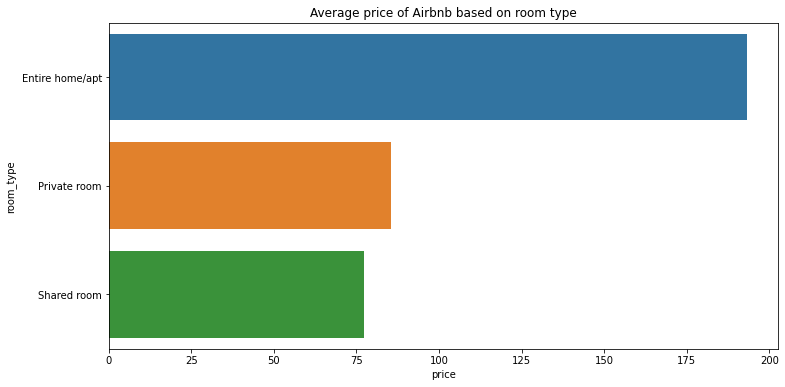

In [33]:
# Average price of AirBnb based on room type 
rt_avgprice = airbnb_df.groupby('room_type')['price'].mean().reset_index().sort_values('price',ascending=False,ignore_index=True)

# Barplot to see different room type by price
ax = sns.barplot(x='price', y='room_type', data=rt_avgprice)
plt.title('Average price of Airbnb based on room type')
ax.set_xlabel('price');

* Most expensive room type is entire home followed by private and share room.
* If you opt for private room you have to pay 50% less then entire home.

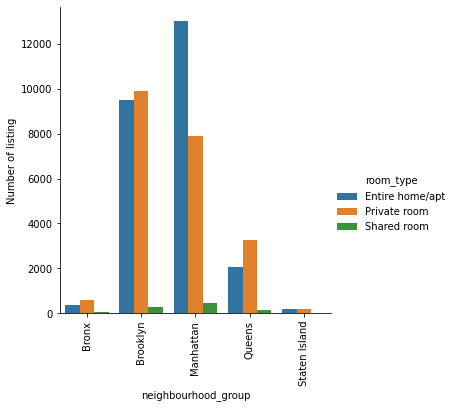

In [34]:
# Number of different room type in  neighbourhood group 
ng_roomtype = airbnb_df.groupby(['neighbourhood_group','room_type'])['id'].count().reset_index().head(15)

# Different neighbourhood group and room type
ax = sns.catplot(
    data=ng_roomtype, kind="bar",
    x="neighbourhood_group", y="id", hue="room_type"
)
ax.set(ylabel = "Number of listing")
plt.xticks(rotation=90);

* The demand of entire home is more in Manhattan followed by 
Brooklyn.
* Demand of private room is more in Brooklyn followed by Manhattan.

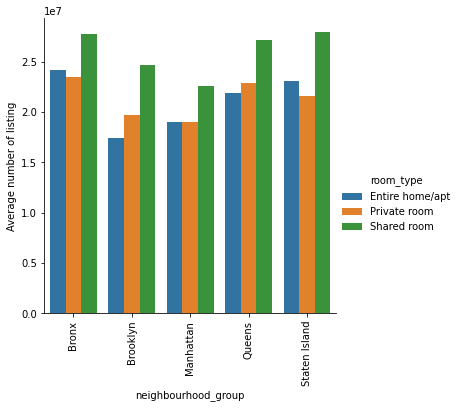

In [35]:
#  Average number of listing different room type in neighbourhood group 
ng_rt_Listing = airbnb_df.groupby(['neighbourhood_group','room_type'])['id'].median().reset_index().head(15)

# Different neighbourhood group and room type
ax = sns.catplot(
    data=ng_rt_Listing, kind="bar",
    x="neighbourhood_group", y="id", hue="room_type"
)
ax.set(ylabel = "Average number of listing")
plt.xticks(rotation=90);

* Average listing of share room is more in Staten island followed by Bronx.
* Average listing of entire home is more in Bronx followed by Staten island.

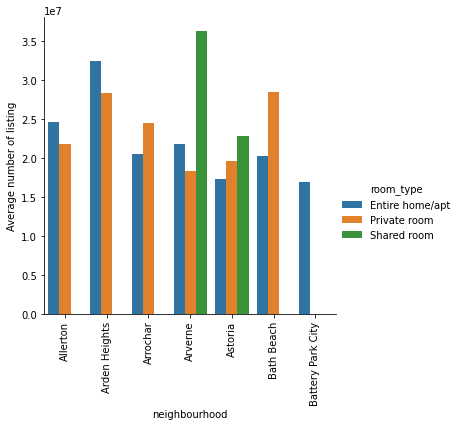

In [36]:
# Different room type listing in neighbourhood 
n_rt_Listing = airbnb_df.groupby(['neighbourhood','room_type'])['id'].median().reset_index().head(15)


# # Different neighbourhood  and room type
ax = sns.catplot(
    data=n_rt_Listing, kind="bar",
    x="neighbourhood", y="id", hue="room_type"
)
ax.set(ylabel = "Average number of listing")
plt.xticks(rotation=90);

* we can see that only two of the top 15 locations have listing for shared room, Arverne neighbourhood in Queens with 'Share room' room type as the highest.

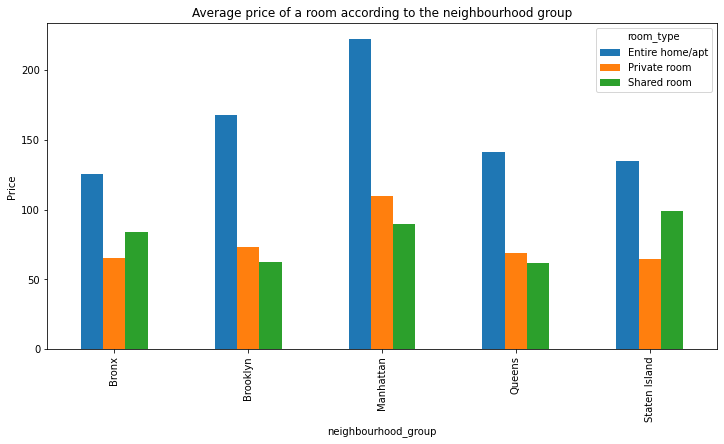

In [37]:
# Combining neighbourhood group with room_type by price
ng_rt_price = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

# Different neighbourhood group, room type and average price
ax = ng_rt_price.plot(kind = "bar")
ax.set_ylabel('Price')

plt.title('Average price of a room according to the neighbourhood group');

* Manhattan has the highest price for room types with Entire home/apt ranging to nearly `222USD/night`, followed by Private room with `109USD/night`.And it’s obvious being the most expensive place to live in!
* In Manhattan you opt for entire home 40% more amount then opt entire home in Brooklyn.


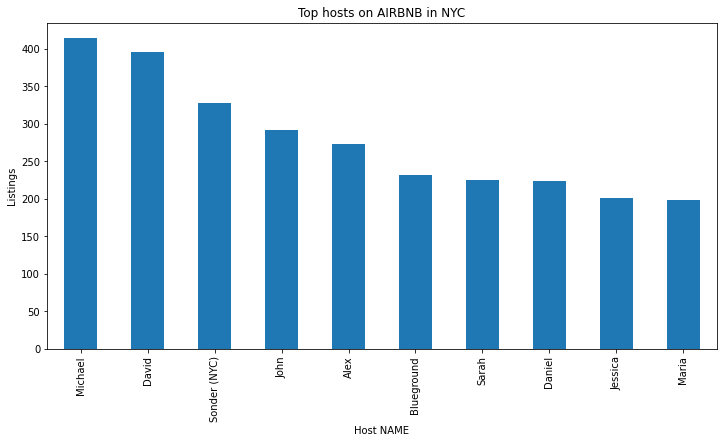

In [38]:
# Top 10 Most Popular Airbnb Hosts
dfhost =airbnb_df.host_name.value_counts()[:10]

# Barplot to see top 10 popular hosts in an Airbnb
ax = dfhost.plot(kind='bar')
ax.set_xlabel('Host NAME')
ax.set_ylabel('Listings')
ax.set_title("Top hosts on AIRBNB in NYC");

* The bar graph shows top 10 hosts in an descending order based on their number of listings. Michael is the top host from the dataset with more than 414 listings.

In [39]:
dfhost

Michael         414
David           396
Sonder (NYC)    327
John            291
Alex            273
Blueground      232
Sarah           225
Daniel          224
Jessica         201
Maria           198
Name: host_name, dtype: int64

In [40]:
#subset of the df only with host Michael
host1_df =  airbnb_df[airbnb_df['host_name']=='Michael']

In [41]:
host1_df.shape

(414, 14)

In [47]:
# Michael listings across the neighbourhood group
host1_df['neighbourhood_group'].value_counts()

Manhattan        211
Brooklyn         157
Queens            37
Bronx              5
Staten Island      4
Name: neighbourhood_group, dtype: int64

In [42]:
# Michael listings across the city
host1_df['neighbourhood'].value_counts()

Williamsburg          41
Chelsea               33
Bedford-Stuyvesant    29
Hell's Kitchen        25
Bushwick              24
                      ..
Dongan Hills           1
Bay Ridge              1
Flatbush               1
Little Italy           1
Theater District       1
Name: neighbourhood, Length: 66, dtype: int64

In [43]:
# Michael listings room type
host1_df['room_type'].value_counts()

Entire home/apt    249
Private room       151
Shared room         14
Name: room_type, dtype: int64

In [44]:
# Michael  listings with minimum nights
host1_df['minimum_nights'].value_counts().head(10)

1     107
2      85
3      77
5      27
4      25
7      25
30     19
6       8
14      6
21      5
Name: minimum_nights, dtype: int64

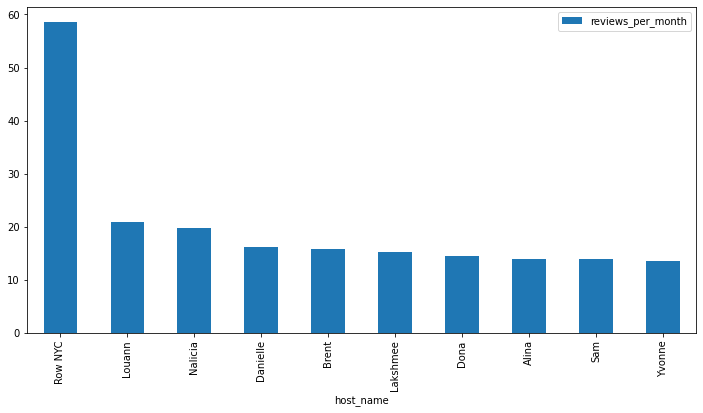

In [45]:
# Top 10 reviewed hosts 
top_reviewed_host = airbnb_df.groupby('host_name')['reviews_per_month'].max().reset_index().sort_values('reviews_per_month',ascending=False,ignore_index=True).head(10)

#Barplot to see top 10 hosts by reviews
top_reviewed_host.plot(x='host_name',y='reviews_per_month',kind='bar');

* The bar graph shows top 10 hosts in an descending order based on their number of reviews/month. Row NYC is the top host from the dataset around 60 reviews/month.

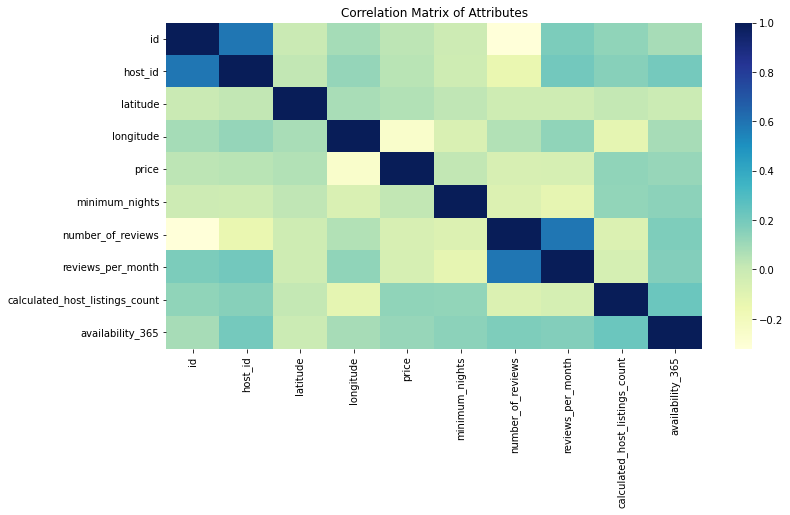

In [46]:
# Correlation Matrix of Attributes
corr_df  = airbnb_df.corr()

# Heatmap to see correlation matrix
ax = sns.heatmap(corr_df,cmap="YlGnBu")
ax.set_title('Correlation Matrix of Attributes');

* Highest Correlation is between.
* reviews_per_month and number_of_reviews: 0.589407
* There is no strong correlation among the numeric variables.

# Conclusion

* All the neighbourhood groups, 'Share room' is the room type that gets most traffic.
* Because it is to most cheapest room type available in all properties. 
* If we calculate with respect to neighbourhood we can see that only two of the top 15 locations have listing for shared room, Arverne neighbourhood in Queens with 'Share room' roomtype as the highest.
* Overall Arverne, staten island  has the highest traffic.
* The most busiest host is michael.Because he is listed more 414 times.
* We can conclude that throughout NewYork city there is a larger preference towards Entire apt as compared to private or shared rooms irrespective to the prices hence the Traffic there are most and busiest host is 'michael'.